# UTSA CS 3793/5233: Assignment-2

Summer 2021


**Maahir - Kalban - (ert547)**






## Learning Objectives



*   Game Playing
*   Adversarial Search
*   Chess - Board Setup & Rules
*   AI - Random vs MinMax



## Description

This assignment is focused on **game playing** and creating a proper **AI for chess**. 
In the following sections, you will complete a series of tasks to create a chess game board, rules for each chess piece, a Random AI and a MinMax AI that plays a game of chess for both players (white and black).

The base structure of the code is provided. You are supposed to write code for each of the functions. Comments are provided on what should be done. You **CANNOT** use a complete chess library and change the base code structure completely. However, you **CAN** change the code layout and name/format of the functions.


#Chess Board Setup & Rules

In this section, you will write code to import the necessary libraries and create:

1.   **ChessBoard** - This part will contain code to initialize the board, draw the board, get the board state and move piece.
2.   **ChessRules** - This part will contain code for the chess rules for each piece.



##Import Libraries

The code here will contain only **import** statements. A base list of the required libraries are already imported. You will most likely not need any other libraries, but if needed, add the import statements here. As mentioned before, you can not use any premade chess libraries.

In [ ]:
# your code goes here
import string
import random
import os
import sys
import time
from IPython.display import clear_output


*italicized text*##ChessBoard

(10 points)

Fill the code in the code structure provided below for the ChessBoard. The main use of this code block write functions to initialize the board, draw the board, get the board state and move piece. You can add any other functions if needed.


In [ ]:
# you can add/change the input parameters for each function 
# you can change the function names and also add more functions if needed

import chess 
import chess.svg



board =  ''
PIECE_SYMBOLS = {       'P': '♟',
                        'B': '♝',
                        'T': '♞',
                        'R': '♜',
                        'Q': '♛',
                        'K': '♚',
                        '.': '♢', 
                        'p': '\033[36m\033[1m♙\033[0m',
                        'b': '\033[36m\033[1m♗\033[0m',
                        't': '\033[36m\033[1m♘\033[0m',
                        'r': '\033[36m\033[1m♖\033[0m',
                        'q': '\033[36m\033[1m♕\033[0m',
                        'k': '\033[36m\033[1m♔\033[0m'}
def ChessBoardSetup():
    # initialize and return a chess board - create a 2D 8x8 array that has the value for each cell
    # USE the following characters for the chess pieces - lower-case for BLACK and upper-case for WHITE
    # . for empty board cell
    # p/P for pawn
    # r/R for rook
    # t/T for knight
    # b/B for bishop
    # q/Q for queen
    # k/K for king
    global board
    global PIECE_SYMBOLS 
    board =  [
    [PIECE_SYMBOLS["r"],PIECE_SYMBOLS["t"],PIECE_SYMBOLS["b"],PIECE_SYMBOLS["q"],PIECE_SYMBOLS["k"],PIECE_SYMBOLS["b"],PIECE_SYMBOLS["t"],PIECE_SYMBOLS["r"]],
    [PIECE_SYMBOLS["p"], PIECE_SYMBOLS["p"],PIECE_SYMBOLS["p"],PIECE_SYMBOLS["p"],PIECE_SYMBOLS["p"],PIECE_SYMBOLS["p"],PIECE_SYMBOLS["p"],PIECE_SYMBOLS["p"]],
    [PIECE_SYMBOLS["."], PIECE_SYMBOLS["."],PIECE_SYMBOLS["."],PIECE_SYMBOLS["."],PIECE_SYMBOLS["."],PIECE_SYMBOLS["."],PIECE_SYMBOLS["."],PIECE_SYMBOLS["."]],
    [PIECE_SYMBOLS["."], PIECE_SYMBOLS["."],PIECE_SYMBOLS["."],PIECE_SYMBOLS["."],PIECE_SYMBOLS["."],PIECE_SYMBOLS["."],PIECE_SYMBOLS["."],PIECE_SYMBOLS["."]],
    [PIECE_SYMBOLS["."], PIECE_SYMBOLS["."],PIECE_SYMBOLS["."],PIECE_SYMBOLS["."],PIECE_SYMBOLS["."],PIECE_SYMBOLS["."],PIECE_SYMBOLS["."],PIECE_SYMBOLS["."]],
    [PIECE_SYMBOLS["."], PIECE_SYMBOLS["."],PIECE_SYMBOLS["."],PIECE_SYMBOLS["."],PIECE_SYMBOLS["."],PIECE_SYMBOLS["."],PIECE_SYMBOLS["."],PIECE_SYMBOLS["."]],
    [PIECE_SYMBOLS["P"], PIECE_SYMBOLS["P"],PIECE_SYMBOLS["P"],PIECE_SYMBOLS["P"],PIECE_SYMBOLS["P"],PIECE_SYMBOLS["P"],PIECE_SYMBOLS["P"],PIECE_SYMBOLS["P"]],
   [PIECE_SYMBOLS["R"],PIECE_SYMBOLS["T"],PIECE_SYMBOLS["B"],PIECE_SYMBOLS["Q"],PIECE_SYMBOLS["K"],PIECE_SYMBOLS["B"],PIECE_SYMBOLS["T"],PIECE_SYMBOLS["R"]],
    ]
    


    
def DrawBoard():
    # write code to print the board - following is one print example
    # r t b q k b t r
    # p p p p p p p p
    # . . . . . . . .
    # . . . . . . . .
    # . . . . . . . .
    # . . . . . . . .
    # P P P P P P P P
    # R T B Q K B T R
    for row in board: 
      print (' '.join (row))


def MovePiece(row, col, to_row, to_col ):
    # write code to move the one chess piece
    # you do not have to worry about the validity of the move - this will be done before calling this function
    # this function will at least take the move (from-peice and to-piece) as input and return the new board layout
    # let's say move the black pawn  at the left most move 2 steps

    global board
    temp =   board[row][col]
    board[row][col] =  board[to_row][to_col]
    board[to_row][to_col] =  temp


if __name__ == "__main__":
  ChessBoardSetup ()
  DrawBoard()


♖ ♘ ♗ ♕ ♔ ♗ ♘ ♖
♙ ♙ ♙ ♙ ♙ ♙ ♙ ♙
♢ ♢ ♢ ♢ ♢ ♢ ♢ ♢
♢ ♢ ♢ ♢ ♢ ♢ ♢ ♢
♢ ♢ ♢ ♢ ♢ ♢ ♢ ♢
♢ ♢ ♢ ♢ ♢ ♢ ♢ ♢
♟ ♟ ♟ ♟ ♟ ♟ ♟ ♟
♜ ♞ ♝ ♛ ♚ ♝ ♞ ♜


##ChessRules

(40 points)

Fill the code in the code structure provided below for ChessRules. The main use of the code block is to write functions to design the rules for movement of each piece on the board. This block will also contain the function to check if the current player is in check, check-mate. You can also have functions that can return the current player's pieces that have legal moves in the current board state. 

Following are some **suggested** functions. You can create/remove functions as needed 


<PseudoLegalMoveGenerator at 0x7f12c2097f10 (Nh3, Nf3, Nc3, Na3, h3, g3, f3, e3, d3, c3, b3, a3, h4, g4, f4, e4, d4, c4, b4, a4)>
<class 'chess.Board'>


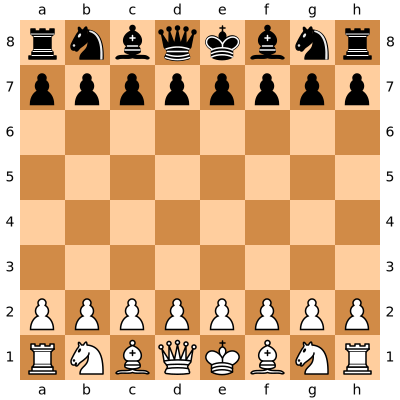

In [ ]:
import chess
board = chess.Board()
print (board.pseudo_legal_moves)
print (type ( board))
board




In [2]:


    
import itertools 
from itertools import product
import random 
import numpy as np
import time
from IPython.display import clear_output

    
    # USE the following characters for the chess pieces - lower-case for BLACK and upper-case for WHITE
    # p/P for pawn
    # r/R for rook
    # t/T for knight
    # b/B for bishop
    # q/Q for queen
    # k/K for king

    #     0   1.  2   3.  4.  5.  6.  7 
    # 0 ["r","t","b","q","k","b","t","r"],
    # 1 ["p", "p","p","p","p","p","p","p"],
    # 2 [".", ".",".",".",".",".",".","."],
    # 3 [".", ".",".",".",".",".",".","."],
    # 4 [".", ".",".",".",".",".",".","."],
    # 5 [".", ".",".",".",".",".",".","."],
    # 6 ["P", "P","P","P","P","P","P","P"],
    # 7 ["R","T","B","Q","K","B","T" ,"R"],

black_player =  { "r1":[0,0],"t1":[0,1],"b1":[0,2],"q":[0,3],"k":[0,4],"b2":[0,5],"t2":[0,6],"r2":[0,7], 
                  "p1": [1,0], "p2":[1,1],"p3":[1,2],"p4": [1,3],"p5":[1,4],"p6":[1,5],"p7":[1,6],"p8":[1,7]
                 }



white_player =  { "R1":[7,0],"T1":[7,1],"B1":[7,2],"Q":[7,3],"K":[7,4],"B2":[7,5],"T2":[7,6],"R2":[7,7], 
                  "P1": [6,0], "P2":[6,1],"P3":[6,2],"P4": [6,3],"P5":[6,4],"P6":[6,5],"P7":[6,6],"P8":[6,7]
                 }
black = ["r1","r2", "t1","t2","b1","b2","q","k",'p1','p2','p3','p4','p5','p6','p7','p8']
white = ["R1","R2", "T1","T2","B1","B2","Q","K",'P1','P2','P3','P4','P5','P6','P7','P8']

white_king = [0,4] # keep track of the white king movement 
black_king = [7,4] # keep track of the black king movement 
white_check = False 
black_check = False 

board = [ 
      ["r","t","b","q","k","b","t","r"],
      ["p", "p","p","p","p","p","p","p"],
      [".", ".",".",".",".",".",".","."],
      [".", ".",".",".",".",".",".","."],
      [".", ".",".",".",".",".",".","."],
      [".", ".",".",".",".",".",".","."],
      ["P", "P","P","P","P","P","P","P"],
      ["R","T","B","Q","K","B","T" ,"R"],
   ]


def IsMoveLegal(row , col, to_row, to_col ):   
    # return True if a move (from-piece and to-piece) is legal, else False
    # this is the KEY function which contains the rules  for each piece type
    if board[row][col] ==   'r' or board[row][col] ==   'R':
        return RookCheckMove ( row , col, to_row, to_col)
    if board[row][col] == 'b' or board[row][col] == 'B':
        return BishopCheckMove ( row , col, to_row, to_col)
    if board[row][col] == 'q' or board[row][col] == 'Q':
        return QueenCheckMove ( row , col, to_row, to_col)
    if board[row][col] == 'p' or board[row][col] == 'P':
        return PawnCheckMove ( row , col, to_row, to_col)
    if board[row][col] == 'k' or board[row][col] == 'K':
        return KingCheckMove ( row , col, to_row, to_col)
    if board[row][col] == 't' or board[row][col] == 'T':
        return KnightCheckMove ( row , col, to_row, to_col)

def DrawBoard():
    # write code to print the board - following is one print example
    # r t b q k b t r
    # p p p p p p p p
    # . . . . . . . .
    # . . . . . . . .
    # . . . . . . . .
    # . . . . . . . .
    # P P P P P P P P
    # R T B Q K B T R
    for row in board: 
      print (' '.join (row))

# checking square is occcupied or not
def SquareOccupied (row,col): 
  return board[row][col] != '.'


# getting a list of valid moves from given piece 
def GetListOfLegalMoves(row,col):
    # gets a list of legal moves for a given piece
    if board[row][col] == 'r' or board[row][col] == 'R':
        return RookValidMoves (row,col)
    if board[row][col] == 'b' or board[row][col] == 'B':
        return BishopValidMoves ( row , col, to_row, to_col)
    if board[row][col] == 'q' or board[row][col] == 'Q':
        return QueenValidMoves ( row , col, to_row, to_col)
    if board[row][col] == 'p' or board[row][col] == 'P':
        return PawnValidMoves( row , col, to_row, to_col)
    if board[row][col] == 'k'or board[row][col] == 'K':
        return KingValidMoves( row , col, to_row, to_col)
    if board[row][col] == 't' or board[row][col] == 'T':
        return KnightValidMoves ( row , col, to_row, to_col)

def GetPiecesWithLegalMoves(turn):
    # gets a list of all pieces for the current player that have legal moves 
    # a piece can be denoted just by (row, col)
    validPositions = [] 
    if turn.isupper(): # Whie current pieces 
        for i in white_player: 
            if  i[0] == 'P': 
                validPositions += PawnValidMoves (white_player.get(i)[0], white_player.get(i)[1], turn)
            if  i[0] == 'R':
                validPositions  += RookValidMoves(white_player.get(i)[0], white_player.get(i)[1], turn )
            if  i[0] ==  'B':
                validPositions  += BishopValidMoves ( white_player.get(i)[0], white_player.get(i)[1],turn)
            if  i[0] == 'Q':
                validPositions  += QueenValidMoves ( white_player.get(i)[0], white_player.get(i)[1],turn)
            if  i[0] ==  'K':
                validPositions  +=  KingValidMoves (white_player.get(i)[0], white_player.get(i)[1],turn)
            if  i[0] ==  'T':
                validPositions  +=  KnightValidMoves ( white_player.get(i)[0], white_player.get(i)[1],turn)

    else : # BLACK CURRENT PLAYER 
        for i in black_player: 
            if i[0] == 'p':
                validPositions += PawnValidMoves (black_player.get(i)[0], black_player.get(i)[1],turn)
            if  i[0] == 'r':
                validPositions  += RookValidMoves( black_player.get(i)[0], black_player.get(i)[1],turn)
            if  i[0] ==  'b':
                validPositions  += BishopValidMoves ( black_player.get(i)[0], black_player.get(i)[1],turn)
            if  i[0] == 'q':
                validPositions  += QueenValidMoves ( black_player.get(i)[0], black_player.get(i)[1],turn)
            if  i[0] ==  'k':
                validPositions  +=  KingValidMoves (black_player.get(i)[0], black_player.get(i)[1],turn)
            if  i[0] ==  't':
                validPositions  +=  KnightValidMoves (black_player.get(i)[0], black_player.get(i)[1],turn)

    return validPositions

        

'''
  Generate piece legal moves 
'''

def KnightValidMoves(row, col, turn ):
    x = row
    y = col 
    filter = [] 
    moves = list(product([x-1, x+1],[y-2, y+2])) + list(product([x-2,x+2],[y-1,y+1]))
    moves = [ {"x" :  x, "y": y }  for x,y in moves if x >= 0 and y >= 0 and x < 8 and y < 8]
    for i in moves: 
      if SquareOccupied (i["x"], i["y"]): 
          if turn.isupper() and board[i["x"]][i["y"]] not in  white_player : 
              filter.append ({"x":i["x"], "y": i["y"] })
          if turn.islower() and board[i["x"]][i["y"]] not in  black_player : 
              filter.append ({"x":i["x"], "y": i["y"] })
      else:
        filter.append ({"x":i["x"], "y": i["y"] })
    return filter 


def DoesMovePutPlayerInCheck (row, col, to_row, to_col ):
    # makes a hypothetical move (from-piece and to-piece)
    # returns True if it puts current player into check
  global white_king 
  global black_king

  validPositions = [] 
  if board[row][col].isupper(): 
    if  board[row][col] == 'R':
        validPositions = RookValidMoves( to_row, to_col)
    if  board[row][col] == 'B':
        validPositions  = BishopValidMoves ( to_row, to_col)
    if  board[row][col] == 'Q':
        validPositions  = QueenValidMove (  to_row, to_col)
    if  board[row][col] == 'P':
        validPositions  = PawnValidMoves(  to_row, to_col)
    if  board[row][col] == 'K':
        validPositions  =  KingValidMoves ( to_row, to_col)
    if  board[row][col] == 'T':
        validPositions  =  KnightValidMoves ( to_row, to_col)

    return ( any(( item["x"] == black_king[0]  and item["y"] == black_king[1] ) for item in PawnValidMoves (row,col)))  # return true or false if the move will put the king in check 

  else : 
    if  board[row][col] == 'r':
        validPositions = RookValidMoves( to_row, to_col)
    if  board[row][col] == 'b':
        validPositions = BishopValidMoves ( to_row, to_col)
    if  board[row][col] == 'q':
        validPositions  = QueenValidMove (  to_row, to_col)
    if  board[row][col] == 'p':
        validPositions  = PawnValidMoves(  to_row, to_col)
    if  board[row][col] == 'k':
        validPositions  =  KingValidMoves ( to_row, to_col)
    if  board[row][col] == 't':
        validPositions  =  KnightValidMoves ( to_row, to_col)

    return ( any(( item["x"] == white_king[0]  and item["y"] == white_king[1] ) for item in PawnValidMoves (row,col))) # return true or false if the move will put the king in check


def PawnValidMoves (row, col , turn ): 

  validPositions = [] 
  if turn == "b":
    validPositions.append({ "x": row+1, "y": col })
    validPositions.append({ "x": row+2, "y":  col})
  else: 
    validPositions.append({ "x": row -1 , "y" :col})
    validPositions.append( { "x": row-2, "y" : col})
  return validPositions



def RookValidMoves (row, col , turn ): 
    validPositions = [] 
    deltas = [(1,0), (-1,0), (0,1), (0,-1)] 
    for (x,y) in deltas: 
        xCandidate = row + x
        yCandidate = col + y
        while  0 <= xCandidate <= 7 and  0 <= yCandidate  <= 7:  
          if SquareOccupied (xCandidate, yCandidate):
            if board[row][col] in black and turn.isupper():
              validPositions.append({ "x": xCandidate, "y": yCandidate}) 
            if board[row][col] in white and turn.islower():
              validPositions.append({ "x": xCandidate, "y": yCandidate}) 
            break 
          validPositions.append({ "x": xCandidate, "y": yCandidate}) 
          xCandidate = xCandidate  + x
          yCandidate = yCandidate  + y

    #capture move 
    filter = [] 
    for i in validPositions: 
      if SquareOccupied (i["x"], i["y"]): 
          if turn.isupper() and board[i["x"]][i["y"]] not in  white_player : 
              filter.append ({"x":i["x"], "y": i["y"] })
          if turn.islower() and board[i["x"]][i["y"]] not in  black_player : 
              filter.append ({"x":i["x"], "y": i["y"] })
      else:
        filter.append ({"x":i["x"], "y": i["y"] })
    return filter 

         

def BishopValidMoves (row, col, turn): 
    validPositions = []
    deltas = [(-1,-1), (1,1), (1,-1), (-1,1)] 
    for (x,y) in deltas: 
        xCandidate = row + x
        yCandidate = col + y
        while  0 <= xCandidate <= 7 and  0 <= yCandidate  <= 7:  
          if SquareOccupied (xCandidate, yCandidate):
            if board[row][col] in black and turn.isupper():
              validPositions.append({ "x": xCandidate, "y": yCandidate}) 
            if board[row][col] in white and turn.islower():
              validPositions.append({ "x": xCandidate, "y": yCandidate}) 
            break 
          validPositions.append({ "x": xCandidate, "y": yCandidate}) 
          xCandidate = xCandidate  + x
          yCandidate = yCandidate  + y
    filter = [] 
    for i in validPositions: 
      if SquareOccupied (i["x"], i["y"]): 
          if turn.isupper() and board[i["x"]][i["y"]] not in  white_player : 
              filter.append ({"x":i["x"], "y": i["y"] })
          if turn.islower() and board[i["x"]][i["y"]] not in  black_player : 
              filter.append ({"x":i["x"], "y": i["y"] })
      else:
        filter.append ({"x":i["x"], "y": i["y"] })
    return filter 




def KingValidMoves (row,col, turn ): 
    deltas = [(-1, -1), (-1, 0), (-1,1), (0, -1 ), (  0, 1), (1, -1), (1, 0), (1, 1)]
    validPositions = []
    for (x, y) in deltas:
        xCandidate = row + x
        yCandidate = col + y
        if 0 <= xCandidate < 8 and 0 <= yCandidate < 8:
            validPositions.append({ "x": xCandidate, "y": yCandidate})

    # for point in validPositions:  # filter out all the SquareOccupied from possible moves 
    #     validPositions[:] = [d for d in validPositions if  SquareOccupied ( d.get('x'), d.get('y')) != True ]
    filter = [] 
    for i in validPositions: 
      if SquareOccupied (i["x"], i["y"]): 
          if turn.isupper() and board[i["x"]][i["y"]] not in  white : 
              filter.append ({"x":i["x"], "y": i["y"] })
          if turn.islower() and board[i["x"]][i["y"]] not in  black: 
              filter.append ({"x":i["x"], "y": i["y"] })
      else:
        filter.append ({"x":i["x"], "y": i["y"] })
    return filter 




def QueenValidMoves (row, col, turn):

  return RookValidMoves ( row,col, turn) + BishopValidMoves (row,col,turn )





'''
  Checking valid move from piece 
'''
def QueenCheckMove (row, col, to_row, to_col ) : 
      return ( col == to_col or row == to_row or abs(col - to_col ) == abs(row - to_row) ) 


def KingCheckMove (row, col, to_row, to_col ) : 
     return (col == to_col + 1 or col == to_col - 1 or col == to_col) and (row == to_row + 1 or row == to_row - 1 or row == to_row) 
       

def PawnCheckMove (row, col, to_row, to_col ) : 
   return ( any(( item["x"] == to_row  and item["y"] == to_col ) for item in PawnValidMoves (row,col)))




def KnightCheckMove (row, col, to_row, to_col ) : 
    if (to_col == col + 1 or to_col == col - 1) and (to_row == row - 2 or to_row == row + 2):
        return True
    elif (to_row == row + 1 or to_row == row - 1) and (to_col == col - 2 or to_col == col + 2):
        return True
    return False


def BishopCheckMove (row, col, to_row, to_col ) : 
   return abs(col - to_col) == abs(row - to_row)



# return True if invalid else return false 
def RookCheckMove (row, col, to_row, to_col ) : 
        d0 = 1 if row > to_row  else -1
        d1 = 1 if col > to_col  else -1
        return any(board[i + j ] for i, j in zip(range(to_row , row , d0 ), range(to_col ,col, d1 )))



def IsCheckmate(turn):
    # returns True if the current player is in checkmate, else False
    global white_king
    global black_king
    if StaleMateCheck (turn):
        print ("Your are in check \n") 
        return True 
    if turn == 'b': 
      if StaleMateCheck (turn) == True and black_check == True:
          print ( "Black Check Mate ") 
          return StaleMateCheck (turn) == True and black_check == True
    else:
      if StaleMateCheck (turn) == True and white_check == True: 
          print ( "White  Check Mate ") 
          return StaleMateCheck (turn) == True and white_check == True

def IsInCheck(turn):
    # returns True if a given player is in Check state
    # One way to check: 
    #   find given player's King
    #   check if any enemy player's piece has a legal move to the given player's King
    #   return True if there is any legal move
    global black_check
    global white_check
   

    if turn.islower():  # black turn , checking if black player has any check 
      moves = GetPiecesWithLegalMoves ("W") # generatte white moves
      for i in moves:
        if i["x"] == black_player.get("k")[0] and i["x"] == black_player.get("k")[1]:
          print ( "\nBlack is in check")
          black_check == True 
          return black_check 

    else:
      moves = GetPiecesWithLegalMoves ("b") # black move generate white moves 
      for i in moves:
          moves = GetPiecesWithLegalMoves ("b")
          if i["x"] == white_player.get("K")[0] and i["x"] == white_player.get("K")[1]:
            print ("\nWhite is in check")
            white_check = True
            return white_check

    return False





def IsClearPath(row , col, to_row , to_col ):
    # helper function to figure out if a move is legal for straight-line moves (rooks, bishops, queens, pawns)
    # returns True if the path is clear for a move (from-piece and to-piece), non-inclusive
    if SquareOccupied (to_row, to_col): 
        return False
    direction  = [ np.sign ( to_row - row )  , np.sign ( to_col -col  )  ]
    destination = [ to_row, to_col ]
    current = [ row + direction[0], col + direction[1]]
    while current != destination and 0 <= current [0] <= 7 and 0 <= current [1]  <= 7 : 
        if board[current[0]][current[1]] != '.': 
          print (current[0], current[1] )
          return False
        current[0] =  current[0] + direction [0]
        current[1] = current[1] + direction [1]
    return True 


def StaleMateCheck (turn) : 
  global black_king
  global white_king 
  validPositions = [] 
  if turn == 'b':   # if checking for black player 
    validPositions = KingValidMoves ( black_king[0], white_king[1], turn)
  else: 
    validPositions = KingValidMoves ( black_king[0], white_king[1], turn)
  return ( len(validPositions) == 0 )


import random 



# set data for board 
board = []



def ChessBoardSetup ():
  global board
  board = [ 
        ["r","t","b","q","k","b","t","r"],
        ["p", "p","p","p","p","p","p","p"],
        [".", ".",".",".",".",".",".","."],
        [".", ".",".",".",".",".",".","."],
        [".", ".",".",".",".",".",".","."],
        [".", ".",".",".",".",".",".","."],
        ["P", "P","P","P","P","P","P","P"],
        ["R","T","B","Q","K","B","T" ,"R"],
    ]

   

#Artificial Intelligence

In this section, you will write code for the Artificial Intelligence (AI) that will play a game of chess. You will write 2 types of AI:

1.   **RandomAI** - This part will contain code for moving a chess piece randomly.
2.   **MinMaxAI** - This part will contain code for moving a chess piece using the MinMax strategy discussed in the lecture.


##RandomAI

(10 points)

Complete the function below that will perform a random move for the given player. The function will return the move (from-piece and to-piece). You will most likely not need to write any other function, but you can, if needed.


In [3]:

def GetRandomMove( valid_moves, turn ):
    # pick a random piece and a random legal move for that piece
    validPositions = []
    piece_random = ''
    if turn.isupper(): #white move 
      piece_random = random.choice (white)
     
      if  piece_random[0] == 'R':
            validPositions = RookValidMoves( white_player.get(piece_random)[0],white_player.get(piece_random)[1], turn )
      if  piece_random[0] == 'B':
            validPositions  = BishopValidMoves ( white_player.get(piece_random)[0],white_player.get(piece_random)[1], turn )
      if  piece_random[0] == 'Q':
            validPositions  = QueenValidMoves ( white_player.get(piece_random)[0],white_player.get(piece_random)[1], turn)
      if  piece_random[0] == 'P':
            validPositions  = PawnValidMoves( white_player.get(piece_random)[0],white_player.get(piece_random)[1] ,turn  )
      if  piece_random[0] == 'K':
            validPositions  =  KingValidMoves ( white_player.get(piece_random)[0],white_player.get(piece_random)[1],turn)
      if piece_random[0] == 'T':
            validPositions  =  KnightValidMoves ( white_player.get(piece_random)[0],white_player.get(piece_random)[1],turn)

    else : #white move 
        piece_random = random.choice (black)
        if  piece_random[0] == 'r':
              validPositions = RookValidMoves( black_player.get(piece_random)[0],black_player.get(piece_random)[1],turn)
        if  piece_random[0] == 'b':
              validPositions  = BishopValidMoves ( black_player.get(piece_random)[0],black_player.get(piece_random)[1],turn)
        if  piece_random[0] == 'q':
              validPositions  = QueenValidMoves (black_player.get(piece_random)[0],black_player.get(piece_random)[1],turn)
        if  piece_random[0]== 'p':
              validPositions  = PawnValidMoves( black_player.get(piece_random)[0],black_player.get(piece_random)[1] ,turn)
        if  piece_random[0] == 'k':
              validPositions  =  KingValidMoves (black_player.get(piece_random)[0],black_player.get(piece_random)[1],turn)
        if piece_random[0]== 't':
              validPositions  =  KnightValidMoves ( black_player.get(piece_random)[0],black_player.get(piece_random)[1],turn)
    if not validPositions:  # if the return is empty list then do the next one until find a move 
        return GetRandomMove( valid_moves, turn )


    return_piece = random.choice(validPositions)
    return_piece["piece"] = piece_random
    return return_piece

def MovePiece (move):
    global board     # using board global 

    IsInCheck(move["piece"])
    if move["piece"].isupper():
      x,y = white_player.get ( move["piece"])
      temp = board [x][y]
      board [x][y] = board[move["x"]][move["y"]]
      board[move["x"]][move["y"]] = temp
      # keep tracking of every piece 
      white_player.get(move["piece"])[0] = move["x"]
      white_player.get(move["piece"])[1] = move["y"]
    else:
      x,y = black_player.get ( move["piece"])
      temp =  board [x][y]
      board [x][y] = board[move["x"]][move["y"]]
      board[move["x"]][move["y"]] = temp
      # keep tracking of every piece 
      black_player.get(move["piece"])[0] = move["x"]
      black_player.get(move["piece"])[1] = move["y"]


if __name__ == "__main__":
    print ("Random AI")
    N = 20
    turns = 0
    turn = "b"
    ChessBoardSetup()
    while not IsCheckmate (turn): 
      if turn.isupper():
        current_legal_moves  = GetPiecesWithLegalMoves (turn)
        random_move =  GetRandomMove( current_legal_moves, turn )
        turn = "b"
        MovePiece (random_move)
        print ("\nWhite Turn")
      else:
        current_legal_moves  = GetPiecesWithLegalMoves (turn)
        random_move =  GetRandomMove( current_legal_moves, turn )
        turn = "W"
        MovePiece (random_move) 
        print ("\nBlack Turn")
      DrawBoard()
      time.sleep(1)
      turns += 1 
      clear_output()
    
   
  
    

IndexError: ignored

##MinMaxAI

(50 points)

Complete the functions below that will perform a move for the given player using the MinMax AI strategy. One function will evaluate the board if a move is performed - give score for each of piece and calculate the score for the entire chess board. In the second function you will write actual code for the MinMax strategy and return the move (from-piece and to-piece). To get the allocated 50 points, searching should be **2-ply (one Max and one Min)**. You will most likely not need to write any other function, but you can, if needed.

## Extra Credit

*   **(5 points)** Modify the above MinMax strategy to be **4-ply (one Max, one Min, one Max, one Min)**.
*   **(5 points)** Perform **alpha-beta pruning** for the MinMax strategy.

In [4]:
import numpy 

class Heuristics:

    # The tables denote the points scored for the position of the chess pieces on the board.

    PAWN_TABLE = numpy.array([
        [ 0,  0,  0,  0,  0,  0,  0,  0],
        [ 5, 10, 10,-20,-20, 10, 10,  5],
        [ 5, -5,-10,  0,  0,-10, -5,  5],
        [ 0,  0,  0, 20, 20,  0,  0,  0],
        [ 5,  5, 10, 25, 25, 10,  5,  5],
        [10, 10, 20, 30, 30, 20, 10, 10],
        [50, 50, 50, 50, 50, 50, 50, 50],
        [ 0,  0,  0,  0,  0,  0,  0,  0]
    ])

    KNIGHT_TABLE = numpy.array([
        [-50, -40, -30, -30, -30, -30, -40, -50],
        [-40, -20,   0,   5,   5,   0, -20, -40],
        [-30,   5,  10,  15,  15,  10,   5, -30],
        [-30,   0,  15,  20,  20,  15,   0, -30],
        [-30,   5,  15,  20,  20,  15,   0, -30],
        [-30,   0,  10,  15,  15,  10,   0, -30],
        [-40, -20,   0,   0,   0,   0, -20, -40],
        [-50, -40, -30, -30, -30, -30, -40, -50]
    ])

    BISHOP_TABLE = numpy.array([
        [-20, -10, -10, -10, -10, -10, -10, -20],
        [-10,   5,   0,   0,   0,   0,   5, -10],
        [-10,  10,  10,  10,  10,  10,  10, -10],
        [-10,   0,  10,  10,  10,  10,   0, -10],
        [-10,   5,   5,  10,  10,   5,   5, -10],
        [-10,   0,   5,  10,  10,   5,   0, -10],
        [-10,   0,   0,   0,   0,   0,   0, -10],
        [-20, -10, -10, -10, -10, -10, -10, -20]
    ])

    ROOK_TABLE = numpy.array([
        [ 0,  0,  0,  5,  5,  0,  0,  0],
        [-5,  0,  0,  0,  0,  0,  0, -5],
        [-5,  0,  0,  0,  0,  0,  0, -5],
        [-5,  0,  0,  0,  0,  0,  0, -5],
        [-5,  0,  0,  0,  0,  0,  0, -5],
        [-5,  0,  0,  0,  0,  0,  0, -5],
        [ 5, 10, 10, 10, 10, 10, 10,  5],
        [ 0,  0,  0,  0,  0,  0,  0,  0]
    ])
    QUEEN_TABLE = numpy.array([
        [-20, -10, -10, -5, -5, -10, -10, -20],
        [-10,   0,   5,  0,  0,   0,   0, -10],
        [-10,   5,   5,  5,  5,   5,   0, -10],
        [  0,   0,   5,  5,  5,   5,   0,  -5],
        [ -5,   0,   5,  5,  5,   5,   0,  -5],
        [-10,   0,   5,  5,  5,   5,   0, -10],
        [-10,   0,   0,  0,  0,   0,   0, -10],
        [-20, -10, -10, -5, -5, -10, -10, -20]
    ])

def evl( row , col , piece ):
    # this function will calculate the score on the board, if a move is performed
    # give score for each of piece and calculate the score for the chess board
    # return specific score for each move 
    if piece[0] == 'p' or piece[0] == 'P':
      return Heuristics.PAWN_TABLE[row][col]
    if piece[0] == 'q' or piece[0] == 'Q':
      return Heuristics.QUEEN_TABLE[row][col]
    if piece[0] == 'k' or piece[0] == 'K':
      return Heuristics.KNIGHT_TABLE[row][col]
    if piece[0] == 't' or piece[0] == 'T':
      return Heuristics.KNIGHT_TABLE[row][col]
    if piece[0] == 'b' or piece[0] == 'B':
      return Heuristics.BISHOP_TABLE[row][col]
    if piece[0] == 'r' or piece[0] == 'R':
      return Heuristics.ROOK_TABLE[row][col]


MAX, MIN = 1000, -1000 
  
# Returns optimal value for current player  
#(Initially called for root and maximizer)  
def GetMinMaxMove(depth, nodeIndex, maximizingPlayer,  
            values, alpha, beta):  
    # to get the allocated 50 points, searching should be 2-ply (one Max and one Min)
    # Python3 program to demonstrate  
    # working of Alpha-Beta Pruning  
    # Initial values of Aplha and Beta  
    # Terminating condition. i.e  
    # leaf node is reached  
    if depth == 1:  
        return values[nodeIndex]  
  
    if maximizingPlayer:  
        best = MIN 

        # Recur for left and right children  
        for i in range(0, 2):  
            val = GetMinMaxMove(depth + 1, nodeIndex * 2 + i,  
                          False, values, alpha, beta)  
            best = max(best, val)  
            alpha = max(alpha, best)  
  
            # Alpha Beta Pruning  
            if beta <= alpha:  
                break 
           
        return best  
       
    else: 
        best = MAX 
        # Recur for left and  
        # right children  
        for i in range(0, 2):  
           
            val = GetMinMaxMove(depth + 1, nodeIndex * 2 + i,  
                            True, values, alpha, beta)  
            best = min(best, val)  
            beta = min(beta, best)  
  
            # Alpha Beta Pruning  
            if beta <= alpha:  
                break 
        return best  

if __name__ == "__main__":  

    values = [1,2,5-1,-3,6,8,9]   # this can be general all the legal moves from current piece 
    print("The best score is :", GetMinMaxMove(1, 1, True, values, MIN, MAX)) 



The best score is : 2


#Game Setup & Main Loop

(10 points)

Write code below to have a game-play between two AIs - Random vs MinMax. For each iteration, draw the board before and after a turn. 

In [ ]:
# initialize and setup the board
# player assignment and counter initializations

# main game loop - while a player is not in checkmate or stalemate (<N turns)
# below is the rough looping strategy
board = [ 
      ["r","t","b","q","k","b","t","r"],
      ["p", "p","p","p","p","p","p","p"],
      [".", ".",".",".",".",".",".","."],
      [".", ".",".",".",".",".",".","."],
      [".", ".",".",".",".",".",".","."],
      [".", ".",".",".",".",".",".","."],
      ["P", "P","P","P","P","P","P","P"],
      ["R","T","B","Q","K","B","T" ,"R"],
   ]

while not IsCheckmate() and turns < N:
    clear_output()
    DrawBoard(board)
    GetRandomMove()
    # write code to take turns and move the pieces
    DrawBoard(board)
    time.sleep(0.5)

# check and print - Stalemate or Checkmate


#Submission Instructions



1.   Complete all tasks above.
2.   Export this notebook as .ipynb
      (File > Download as ipynb)
3.   Upload the .ipynb file on Blackboard



##Rubric


* (10 points) Chess Board Setup
* (60 points) Chess Rules Setup
* (10 points) Random AI
* (60 points) MinMax AI (2-ply)
* (10 points) Game Main Loop - Random vs MinMax
* (20 points) Extra Credit - 4-ply MinMax + alpha-beta pruning



